# Evaluation
// using saved confusion matrices

#### Prepare venv

In [98]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np

In [99]:
dir = "../results/confusion_matrices/linear/"
labels = ["canter", "trot", "walk"]

#### Calc Metrics

In [100]:
def calc_confusion_matrix(preds, labels):
    """ rows = true labels, cols = predicted labels """
    cm = torch.zeros((3, 3), dtype=torch.int64)
    for t, p in zip(labels, preds):
        cm[t, p] += 1
    return cm

In [101]:
def calc_accuracy(cm, perclass=False):
    if perclass:
        """Accuracy     = TruePositive / suma wszystkich elementów"""
        tp = cm.diag()
        total = cm.sum(dim=1)  
        return tp.float() / (total.float() + 1e-8)
    else:
        """Accuracy     = suma przekątnej / suma wszystkich elementów"""
        return cm.diag().sum().item() / cm.sum().item()

In [102]:
def calc_precision(cm, perclass=False):
    """Precision per class      = TruePositive / (TruePositive + FalsePositive)"""
    tp = cm.diag().float()
    fp = cm.sum(dim=0).float() - tp
    per_class_precision = tp / (tp + fp + 1e-8)
    
    if perclass:
        return per_class_precision
    else:
        return per_class_precision.mean().item()

In [103]:
def calc_recall(cm, perclass=False):
    """Recall per class         = TruePositive / (TruePositive + FalseNegative)"""
    tp = cm.diag().float()
    fn = cm.sum(dim=1).float() - tp
    per_class_recall = tp / (tp + fn + 1e-8)
    
    if perclass:
        return per_class_recall
    else:
        return per_class_recall.mean().item()

## Mean matrix

In [104]:
cms = []

for file in os.listdir(dir):
    cm_part = torch.load(os.path.join(dir, file)).float()
    cms.append(cm_part)
    
cm = torch.stack(cms, dim=0).mean(dim=0)

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\4173097323.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm_part = torch.load(os.path.join(dir, file)).float()


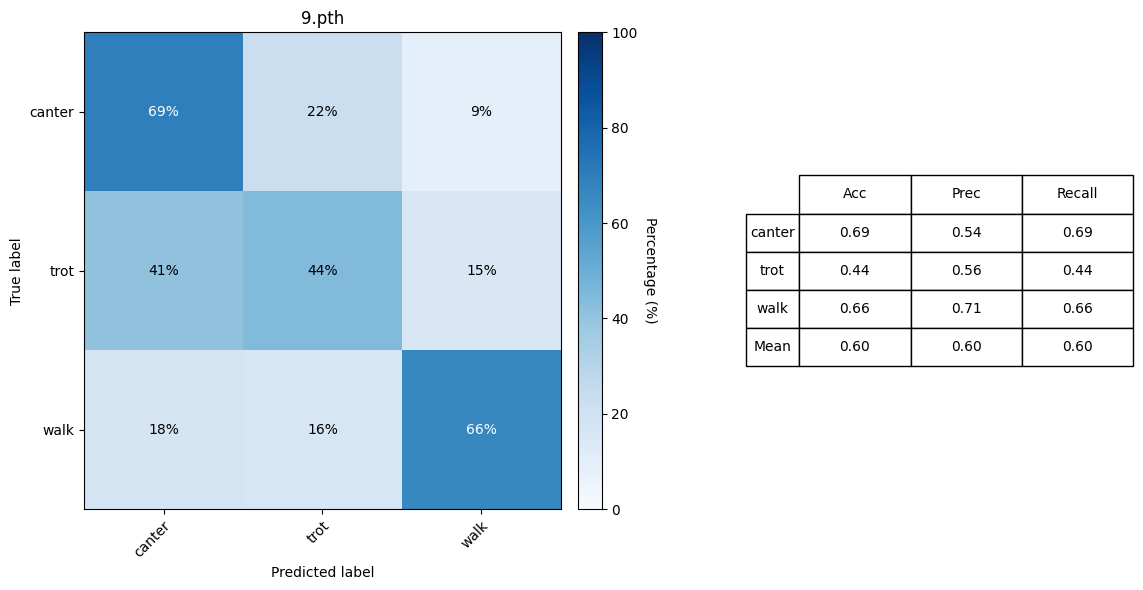

In [105]:
cm_percent = cm.float() / cm.sum(dim=1, keepdim=True) * 100

fig, ax = plt.subplots(figsize=(20, 6))
im = ax.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
cbar = ax.figure.colorbar(im, ax=ax, pad=0.01)
cbar.ax.set_ylabel("Percentage (%)", rotation=-90, va="bottom")

# set ticks and labels
ax.set(xticks=np.arange(len(labels)),
        yticks=np.arange(len(labels)),
        xticklabels=labels,
        yticklabels=labels,
        ylabel="True label",
        xlabel="Predicted label",
        title=file)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# annotate heatmap cells
for i in range(cm_percent.shape[0]):
    for j in range(cm_percent.shape[1]):
        ax.text(j, i, f"{cm_percent[i, j]:.0f}%", ha="center", va="center",
                color="white" if cm_percent[i, j] > 50 else "black")

# compute metrics per class
acc = calc_accuracy(cm, perclass=True)
prec = calc_precision(cm, perclass=True)
rec = calc_recall(cm, perclass=True)

# create metrics table
cell_text = []
for i, cls in enumerate(labels):
    cell_text.append([f"{acc[i]:.2f}", f"{prec[i]:.2f}", f"{rec[i]:.2f}"])

# compute mean metrics
acc = calc_accuracy(cm, perclass=False)
prec = calc_precision(cm, perclass=False)
rec = calc_recall(cm, perclass=False)

# create metrics table
cell_text.append([f"{acc:.2f}", f"{prec:.2f}", f"{rec:.2f}"])

row_labels = labels + ["Mean"]
table = plt.table(cellText=cell_text,
                    rowLabels=row_labels,
                    colLabels=["Acc", "Prec", "Recall"],
                    cellLoc="center",
                    rowLoc="center",
                    colLoc="center",
                    loc="right",
                    bbox=[1.5, 0.3, 0.7, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)

fig.tight_layout()
plt.show()

## Per matrix

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


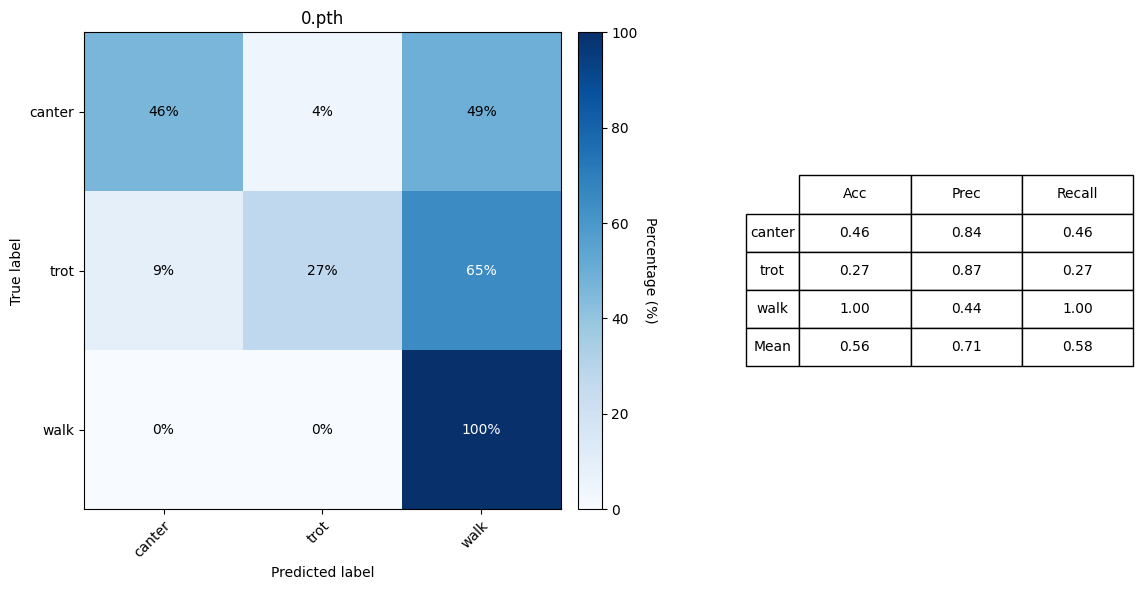

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


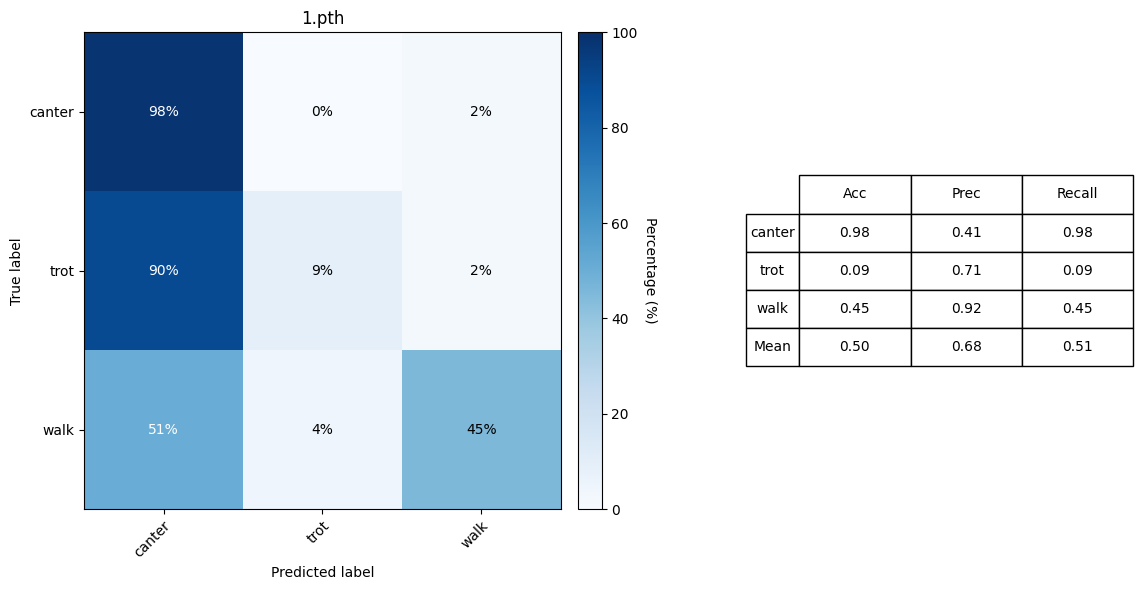

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


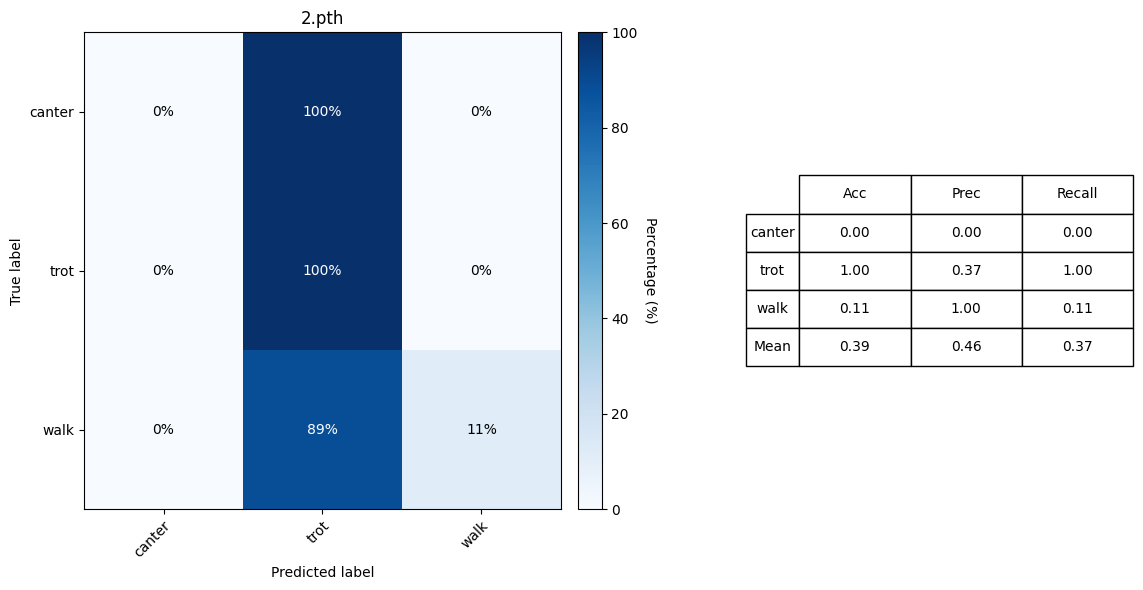

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


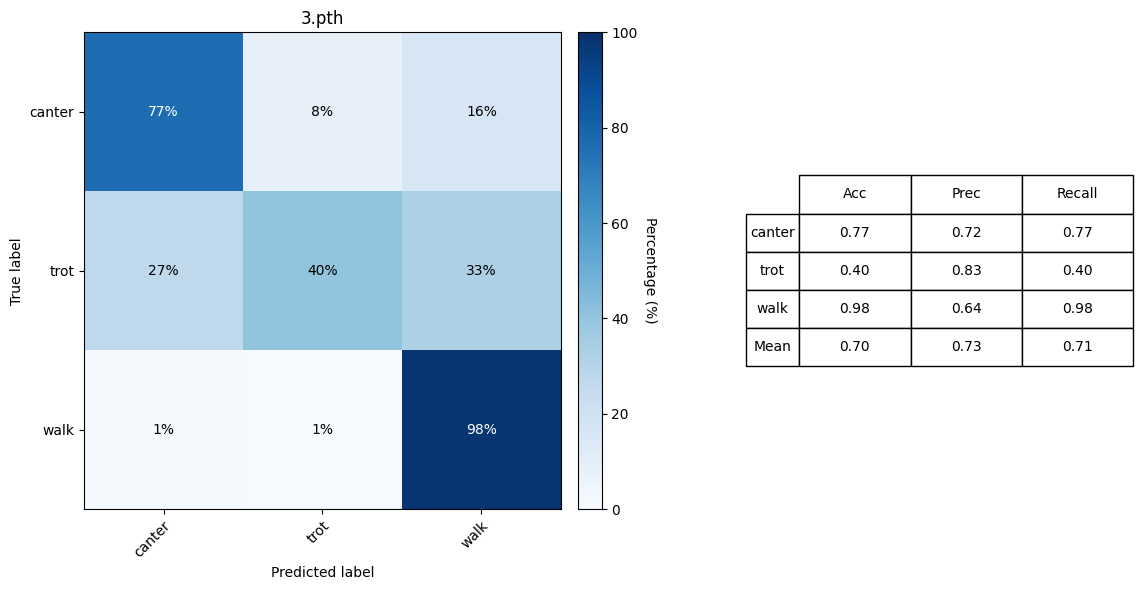

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


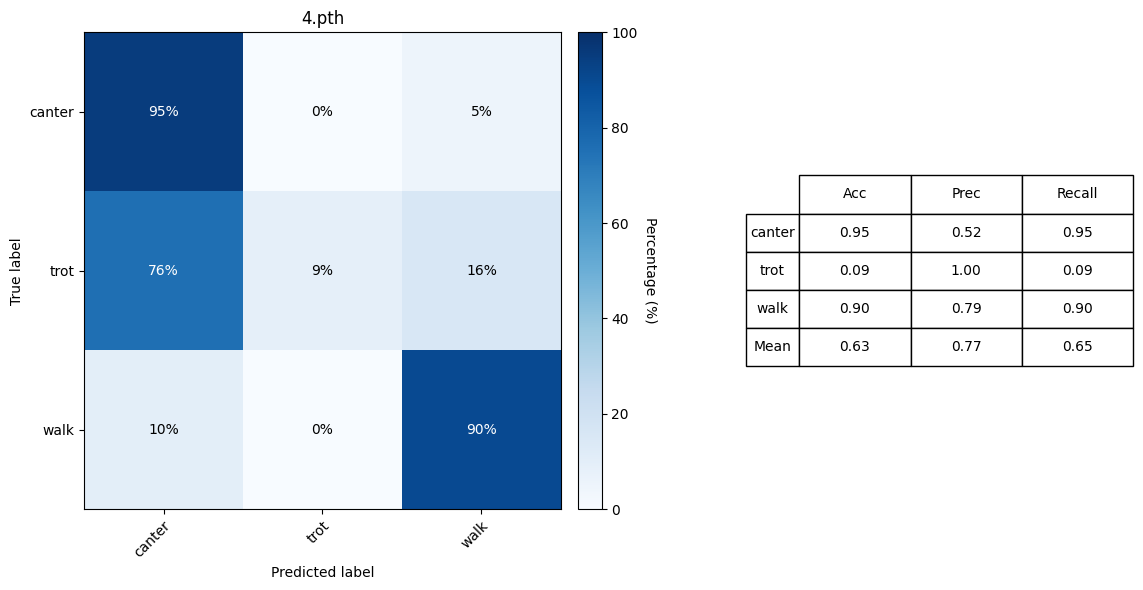

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


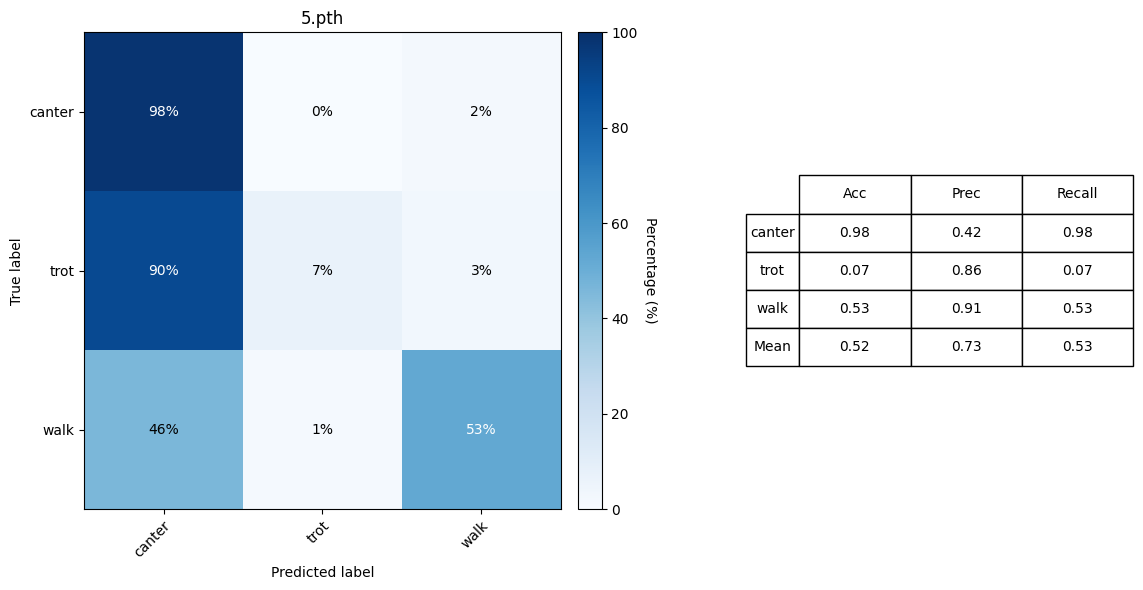

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


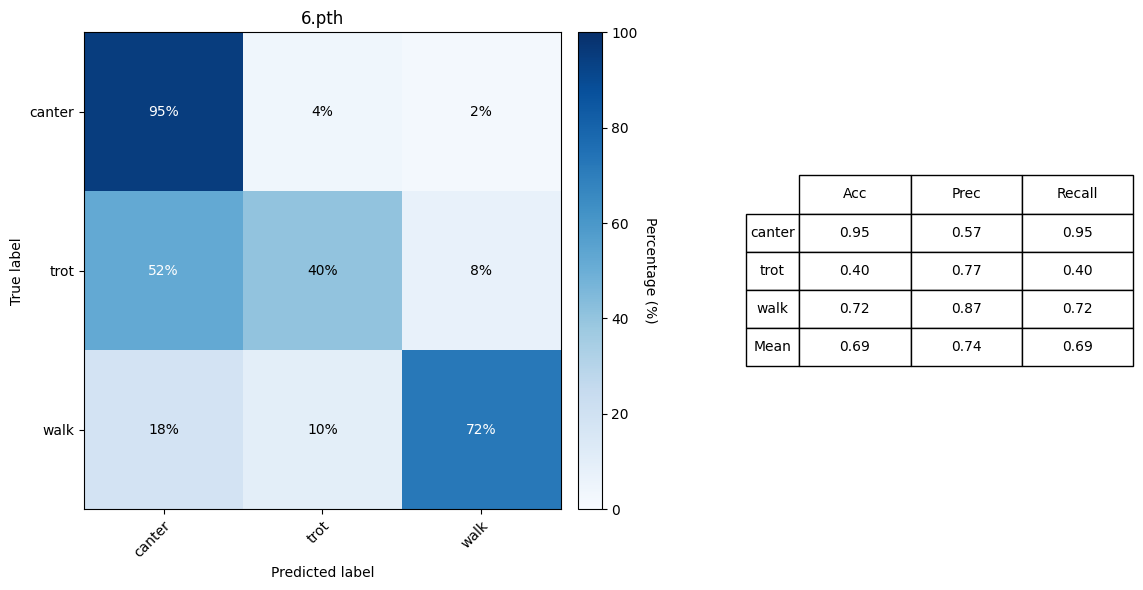

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


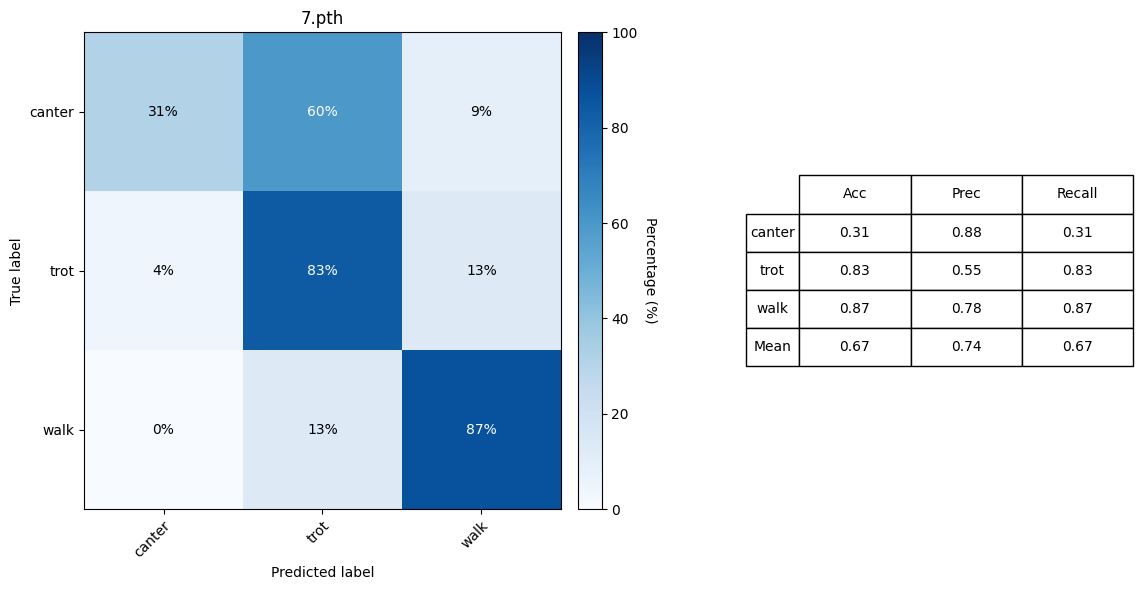

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


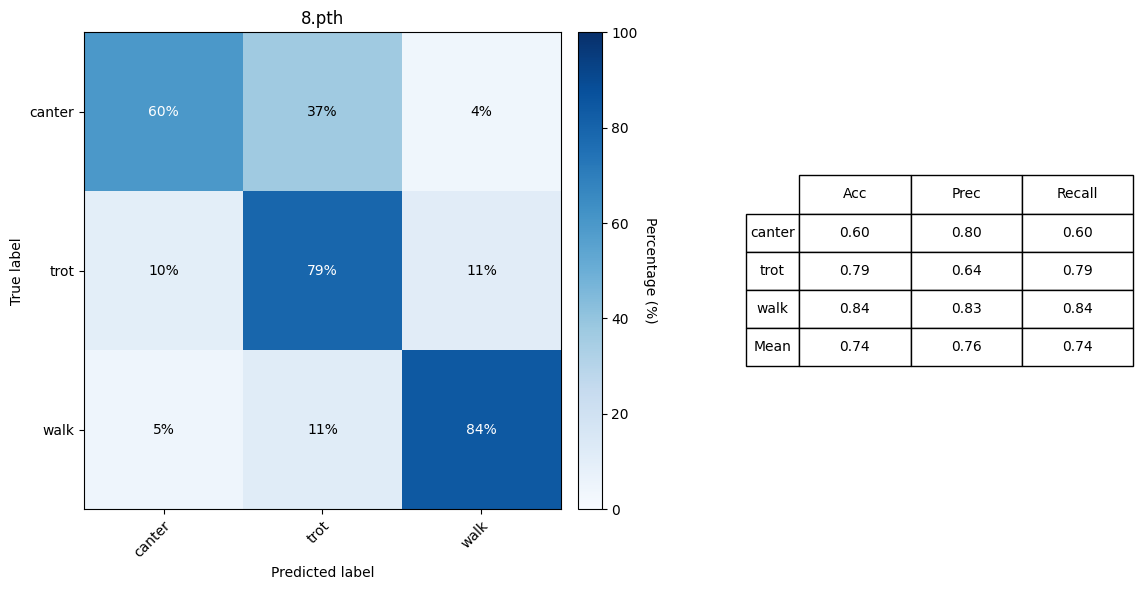

C:\Users\1310i\AppData\Local\Temp\ipykernel_51592\3254179052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cm = torch.load(os.path.join(dir, file))


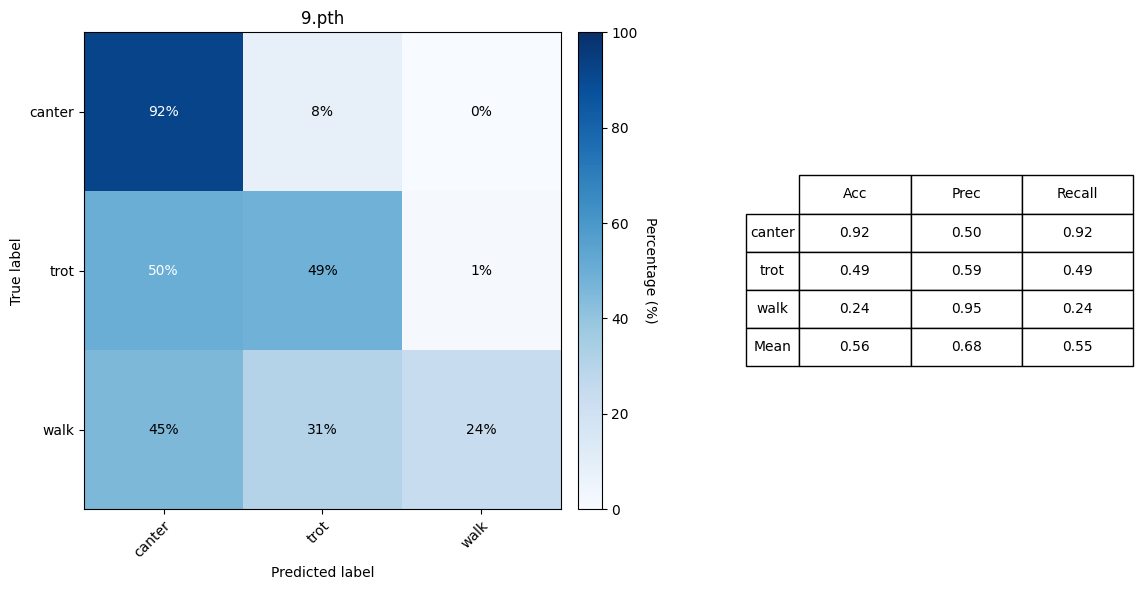

In [106]:
for file in os.listdir(dir):
    cm = torch.load(os.path.join(dir, file))
    
    cm_percent = cm.float() / cm.sum(dim=1, keepdim=True) * 100

    fig, ax = plt.subplots(figsize=(20, 6))
    im = ax.imshow(cm_percent, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    cbar = ax.figure.colorbar(im, ax=ax, pad=0.01)
    cbar.ax.set_ylabel("Percentage (%)", rotation=-90, va="bottom")

    # set ticks and labels
    ax.set(xticks=np.arange(len(labels)),
           yticks=np.arange(len(labels)),
           xticklabels=labels,
           yticklabels=labels,
           ylabel="True label",
           xlabel="Predicted label",
           title=file)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # annotate heatmap cells
    for i in range(cm_percent.shape[0]):
        for j in range(cm_percent.shape[1]):
            ax.text(j, i, f"{cm_percent[i, j]:.0f}%", ha="center", va="center",
                    color="white" if cm_percent[i, j] > 50 else "black")

    # compute metrics per class
    acc = calc_accuracy(cm, perclass=True)
    prec = calc_precision(cm, perclass=True)
    rec = calc_recall(cm, perclass=True)

    # create metrics table
    cell_text = []
    for i, cls in enumerate(labels):
        cell_text.append([f"{acc[i]:.2f}", f"{prec[i]:.2f}", f"{rec[i]:.2f}"])
    
    # compute mean metrics
    acc = calc_accuracy(cm, perclass=False)
    prec = calc_precision(cm, perclass=False)
    rec = calc_recall(cm, perclass=False)
    
    # create metrics table
    cell_text.append([f"{acc:.2f}", f"{prec:.2f}", f"{rec:.2f}"])

    row_labels = labels + ["Mean"]
    table = plt.table(cellText=cell_text,
                      rowLabels=row_labels,
                      colLabels=["Acc", "Prec", "Recall"],
                      cellLoc="center",
                      rowLoc="center",
                      colLoc="center",
                      loc="right",
                      bbox=[1.5, 0.3, 0.7, 0.4])
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    fig.tight_layout()
    plt.show()